# 0.0 Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import plotly.express as px
import urllib.request
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Define custom color palette
ifood_colors = ['#FF5900', '#00A8E0', '#7B1467', '#F5A623', '#009246', '#FFC800', '#DE0046', '#7440FF']

# 1.0 Get the Data

## 1.1 Download the data

In [3]:
IFOOD_URL = "https://github.com/ifood/ifood-data-business-analyst-test/raw/master/ml_project1_data.csv"

def fetch_ifood_data():
    csv_path = "ml_project1_data.csv"
    urllib.request.urlretrieve(IFOOD_URL, csv_path)

def load_ifood_data():
    return pd.read_csv("ml_project1_data.csv")

In [4]:
fetch_ifood_data()
ifood_data = load_ifood_data()

## 1.2 Quick look at the data structure

In [5]:
ifood_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
ifood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
ifood_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

Saving figure attribute_histogram_plots


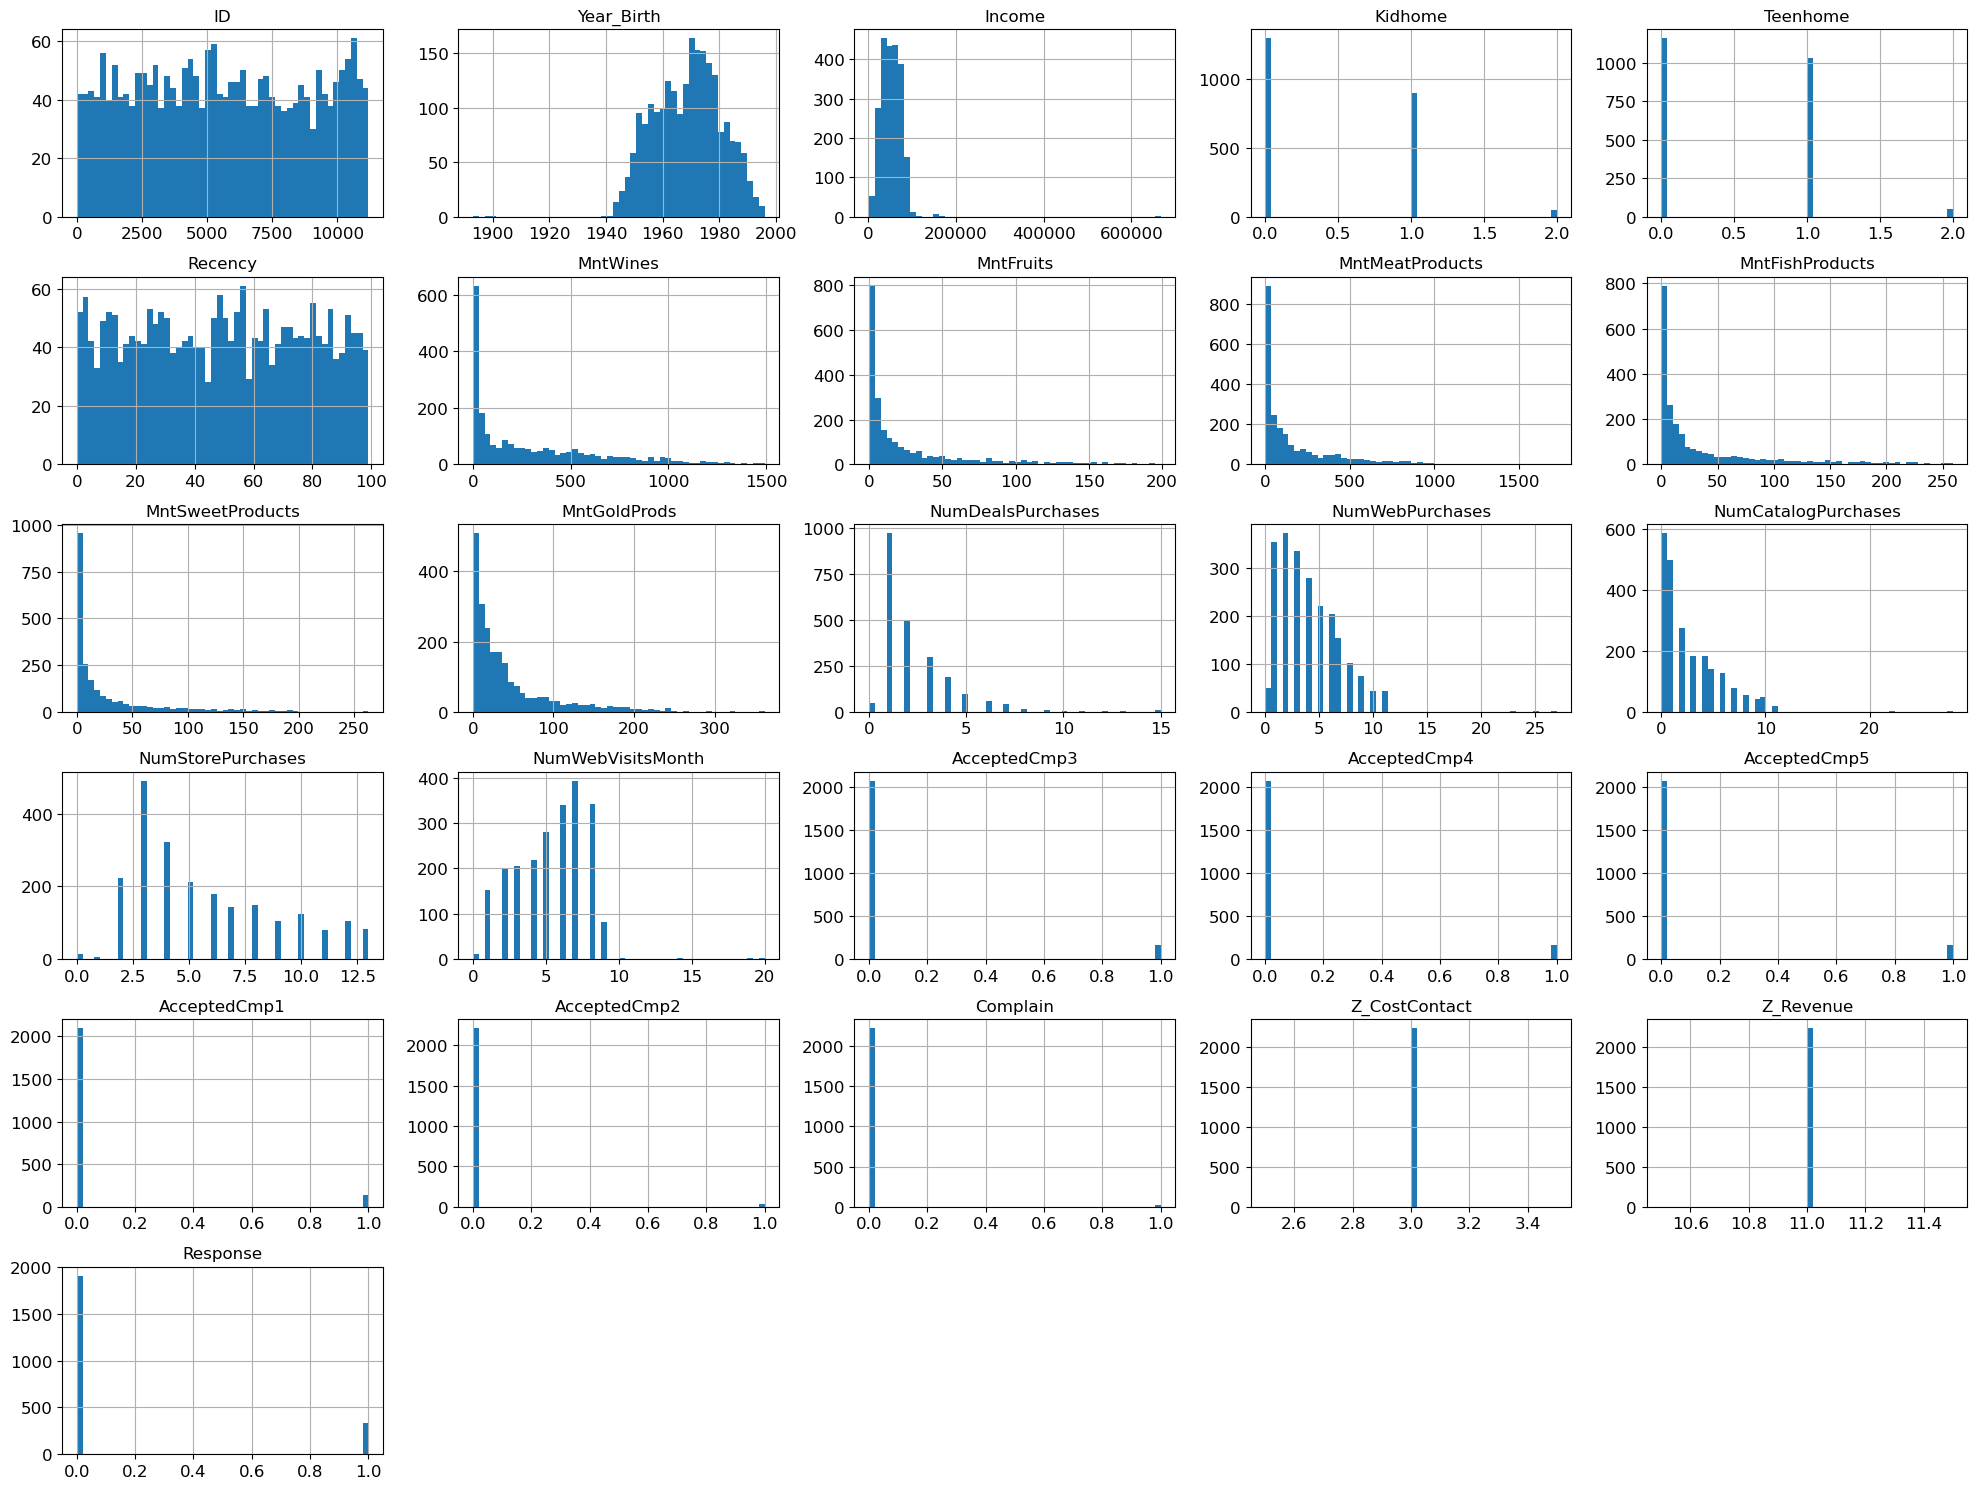

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

ifood_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## 1.3 Creating test set

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# Divide dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ifood_data, ifood_data["Response"]):
    strat_train_set = ifood_data.iloc[train_index]
    strat_test_set = ifood_data.iloc[test_index]

In [10]:
strat_test_set["Response"].value_counts() / len(strat_test_set)

0    0.850446
1    0.149554
Name: Response, dtype: float64

In [11]:
ifood_data["Response"].value_counts() / len(ifood_data)

0    0.850893
1    0.149107
Name: Response, dtype: float64

## 1.4 Exploratory Data Analysis (EDA)

In [12]:
ifood = strat_train_set.copy()

In [13]:
ifood.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1090  1127        1973       PhD        Married  85844.0        0         0   
15    2114        1946       PhD         Single  82800.0        0         0   
873    738        1981  2n Cycle         Single  42395.0        1         1   
610   7930        1969    Master         Single  26877.0        0         0   
657    946        1958  2n Cycle       Together  26490.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1090  2014-05-29       62       938  ...                  2             0   
15    2012-11-24       23      1006  ...                  3             0   
873   2014-04-04       35        48  ...                  7             0   
610   2013-08-19       74       101  ...                  6             0   
657   2012-09-22       92        45  ...                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1090             0             1             0             0         0   
15               0             1             1             0         0   
873              0             0             0             0         0   
610              0             0             0             0         0   
657              0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1090              3         11         0  
15                3         11         1  
873               3         11         0  
610               3         11         0  
657               3         11         0  

[5 rows x 29 columns]

In [14]:
ifood["Education"].value_counts()

Graduation    887
PhD           388
Master        307
2n Cycle      163
Basic          47
Name: Education, dtype: int64

In [15]:
# Just correcting grammar here
ifood['Education'] = ifood['Education'].replace('2n Cycle', '2nd Cycle')

In [16]:
# Count the education levels
education_counts = ifood['Education'].value_counts(normalize=True) * 100

# Create DataFrame
df_education = pd.DataFrame({'Education_Level': education_counts.index,
                             'Percentage': education_counts.values})

# Create bar chart
fig = px.bar(df_education, x='Education_Level', y='Percentage',
             title='Distribution of Education Levels',
             labels={'Percentage': 'Percentage (%)', 'Education_Level': 'Education Level'},
             color='Education_Level', color_discrete_sequence=ifood_colors)

# Add percentages on top of bars
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Show plot
save_fig("education_plot")
fig.show()

Saving figure education_plot


<Figure size 640x480 with 0 Axes>

In [17]:
ifood["Marital_Status"].value_counts()

Married     701
Together    458
Single      383
Divorced    183
Widow        60
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [18]:
# Dropping rows with values "Alone", "Absurd", and "YOLO" in the "Marital_Status" column
ifood = ifood[~ifood["Marital_Status"].isin(["Alone", "Absurd", "YOLO"])]

In [19]:
# Count the marital status
marital_counts = ifood['Marital_Status'].value_counts(normalize=True) * 100

# Create DataFrame
df_marital = pd.DataFrame({'Marital_Status': marital_counts.index,
                           'Percentage': marital_counts.values})

# Create bar chart for Marital_Status with ifood_colors
fig_marital = px.bar(df_marital, x='Marital_Status', y='Percentage',
                      title='Distribution of Marital Status',
                      labels={'Percentage': 'Percentage (%)', 'Marital_Status': 'Marital Status'},
                      color='Marital_Status', color_discrete_sequence=ifood_colors)

# Add percentages on top of bars
fig_marital.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Show plot
save_fig("marital_status_plot")
fig_marital.show()

Saving figure marital_status_plot


<Figure size 640x480 with 0 Axes>

Saving figure numeric_histogram_plots


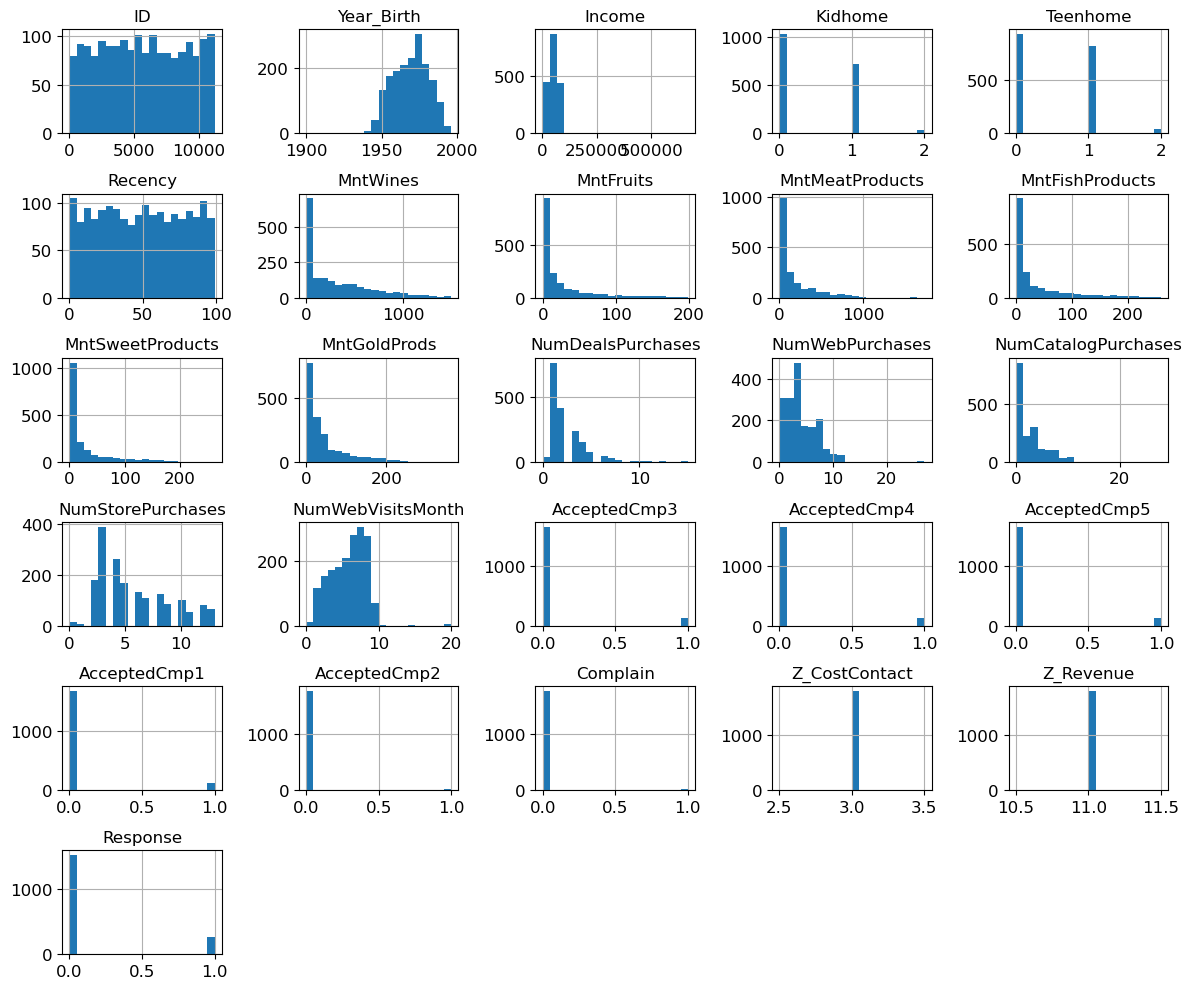

In [20]:
# Distribution visualization of numeric variables

# Get the list of numerical column names
numeric_vars = ifood.select_dtypes(include=['float64', 'int64']).columns

ifood[numeric_vars].hist(bins=20, figsize=(12, 10))
save_fig("numeric_histogram_plots")
plt.show()

Saving figure distr_mnt_prod_plots


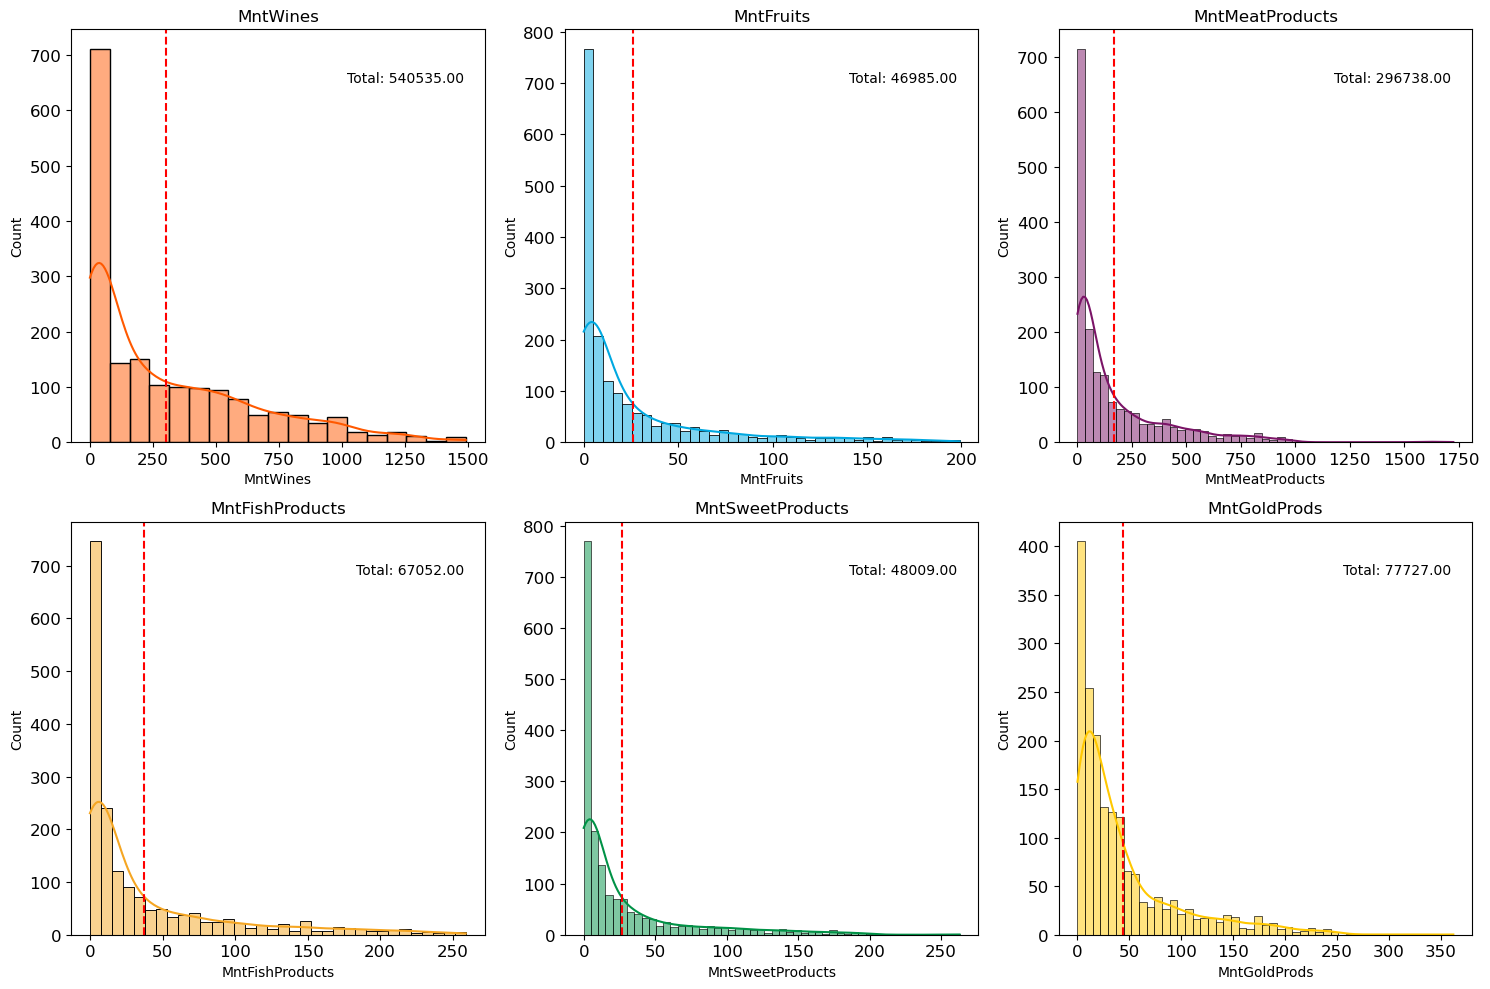

In [21]:
# List of variables that were summed to calculate total expenses
total_expenses_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots for distribution plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create distribution plots for each variable
for i, var in enumerate(total_expenses_vars):
    sns.histplot(ifood[var], ax=axes[i], kde=True, color=ifood_colors[i])
    axes[i].set_title(var)
    # Add mean to the plot
    mean_value = ifood[var].mean()
    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    # Add total value to the plot
    total_value = ifood[var].sum()
    axes[i].text(0.95, 0.9, f'Total: {total_value:.2f}', ha='right', va='top', transform=axes[i].transAxes)

plt.tight_layout()
save_fig("distr_mnt_prod_plots")
plt.show()

Saving figure distr_purchases_plots


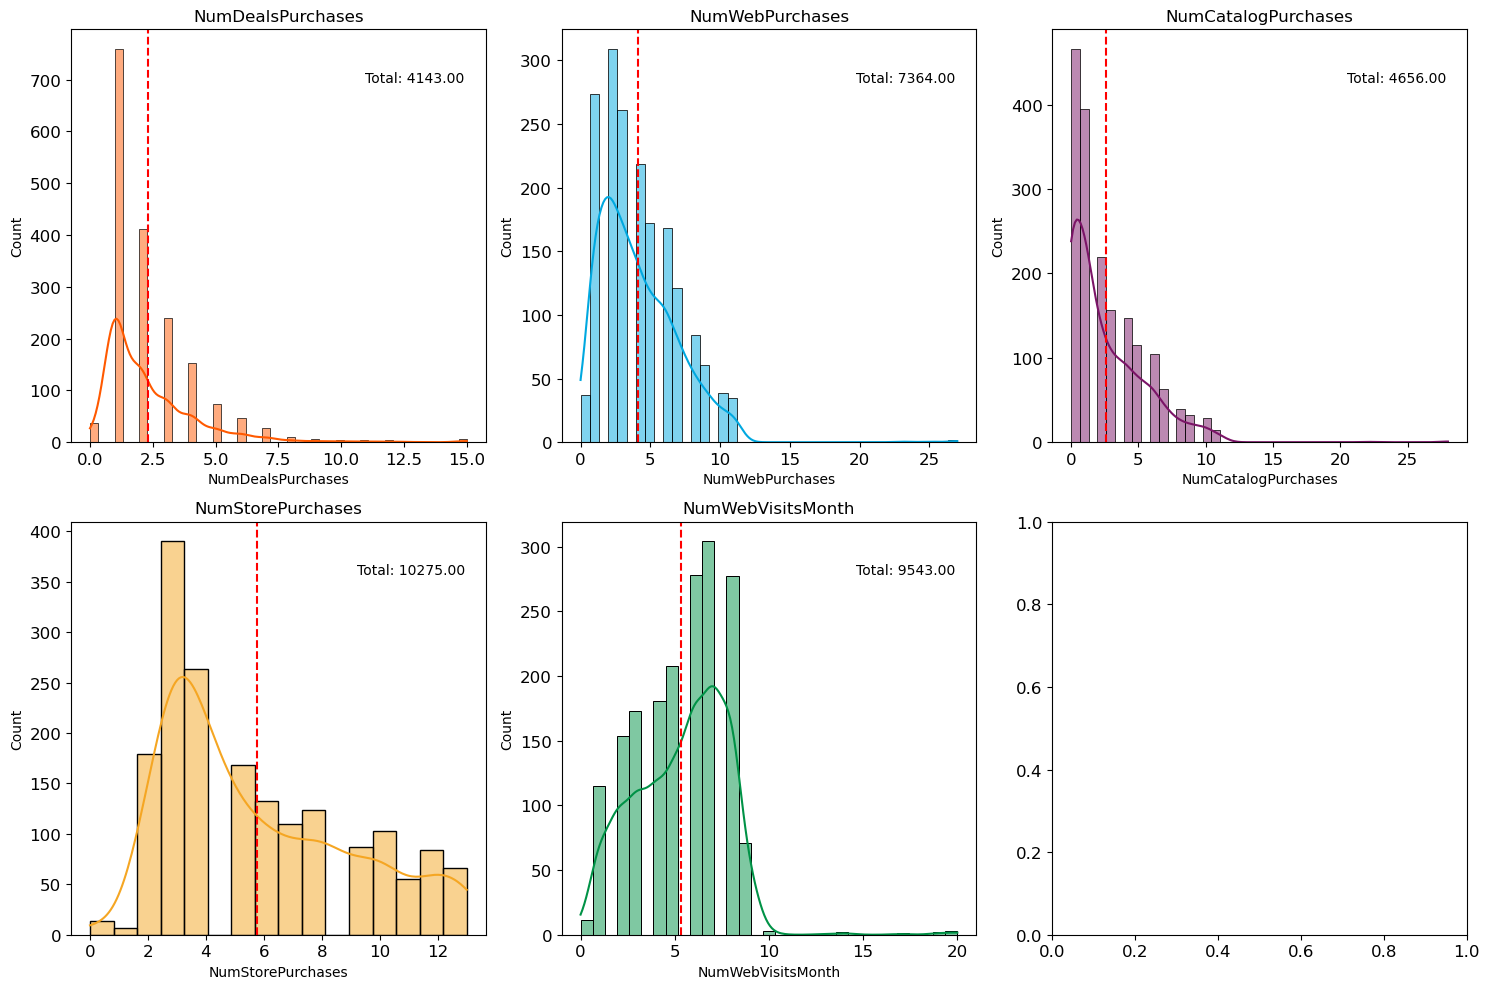

In [36]:
# List of variables related to volume of purchases
purchases_vars = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Create subplots for distribution plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create distribution plots for each variable
for i, var in enumerate(purchases_vars):
    sns.histplot(ifood[var], ax=axes[i], kde=True, color=ifood_colors[i])
    axes[i].set_title(var)
    # Add mean to the plot
    mean_value = ifood[var].mean()
    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    # Add total value to the plot
    total_value = ifood[var].sum()
    axes[i].text(0.95, 0.9, f'Total: {total_value:.2f}', ha='right', va='top', transform=axes[i].transAxes)

plt.tight_layout()
save_fig("distr_purchases_plots")
plt.show()

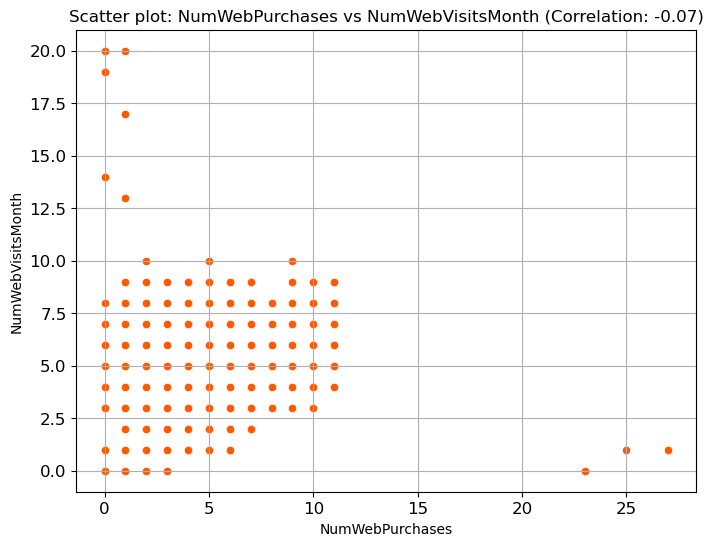

In [38]:
# Calculate correlation coefficient
correlation = ifood['NumWebPurchases'].corr(ifood['NumWebVisitsMonth'])

# Scatter plot between NumWebPurchases and NumWebVisitsMonth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=ifood, color=ifood_colors[0])
plt.title(f'Scatter plot: NumWebPurchases vs NumWebVisitsMonth (Correlation: {correlation:.2f})')
plt.xlabel('NumWebPurchases')
plt.ylabel('NumWebVisitsMonth')
plt.grid(True)
plt.show()

Saving figure numeric_box_plots


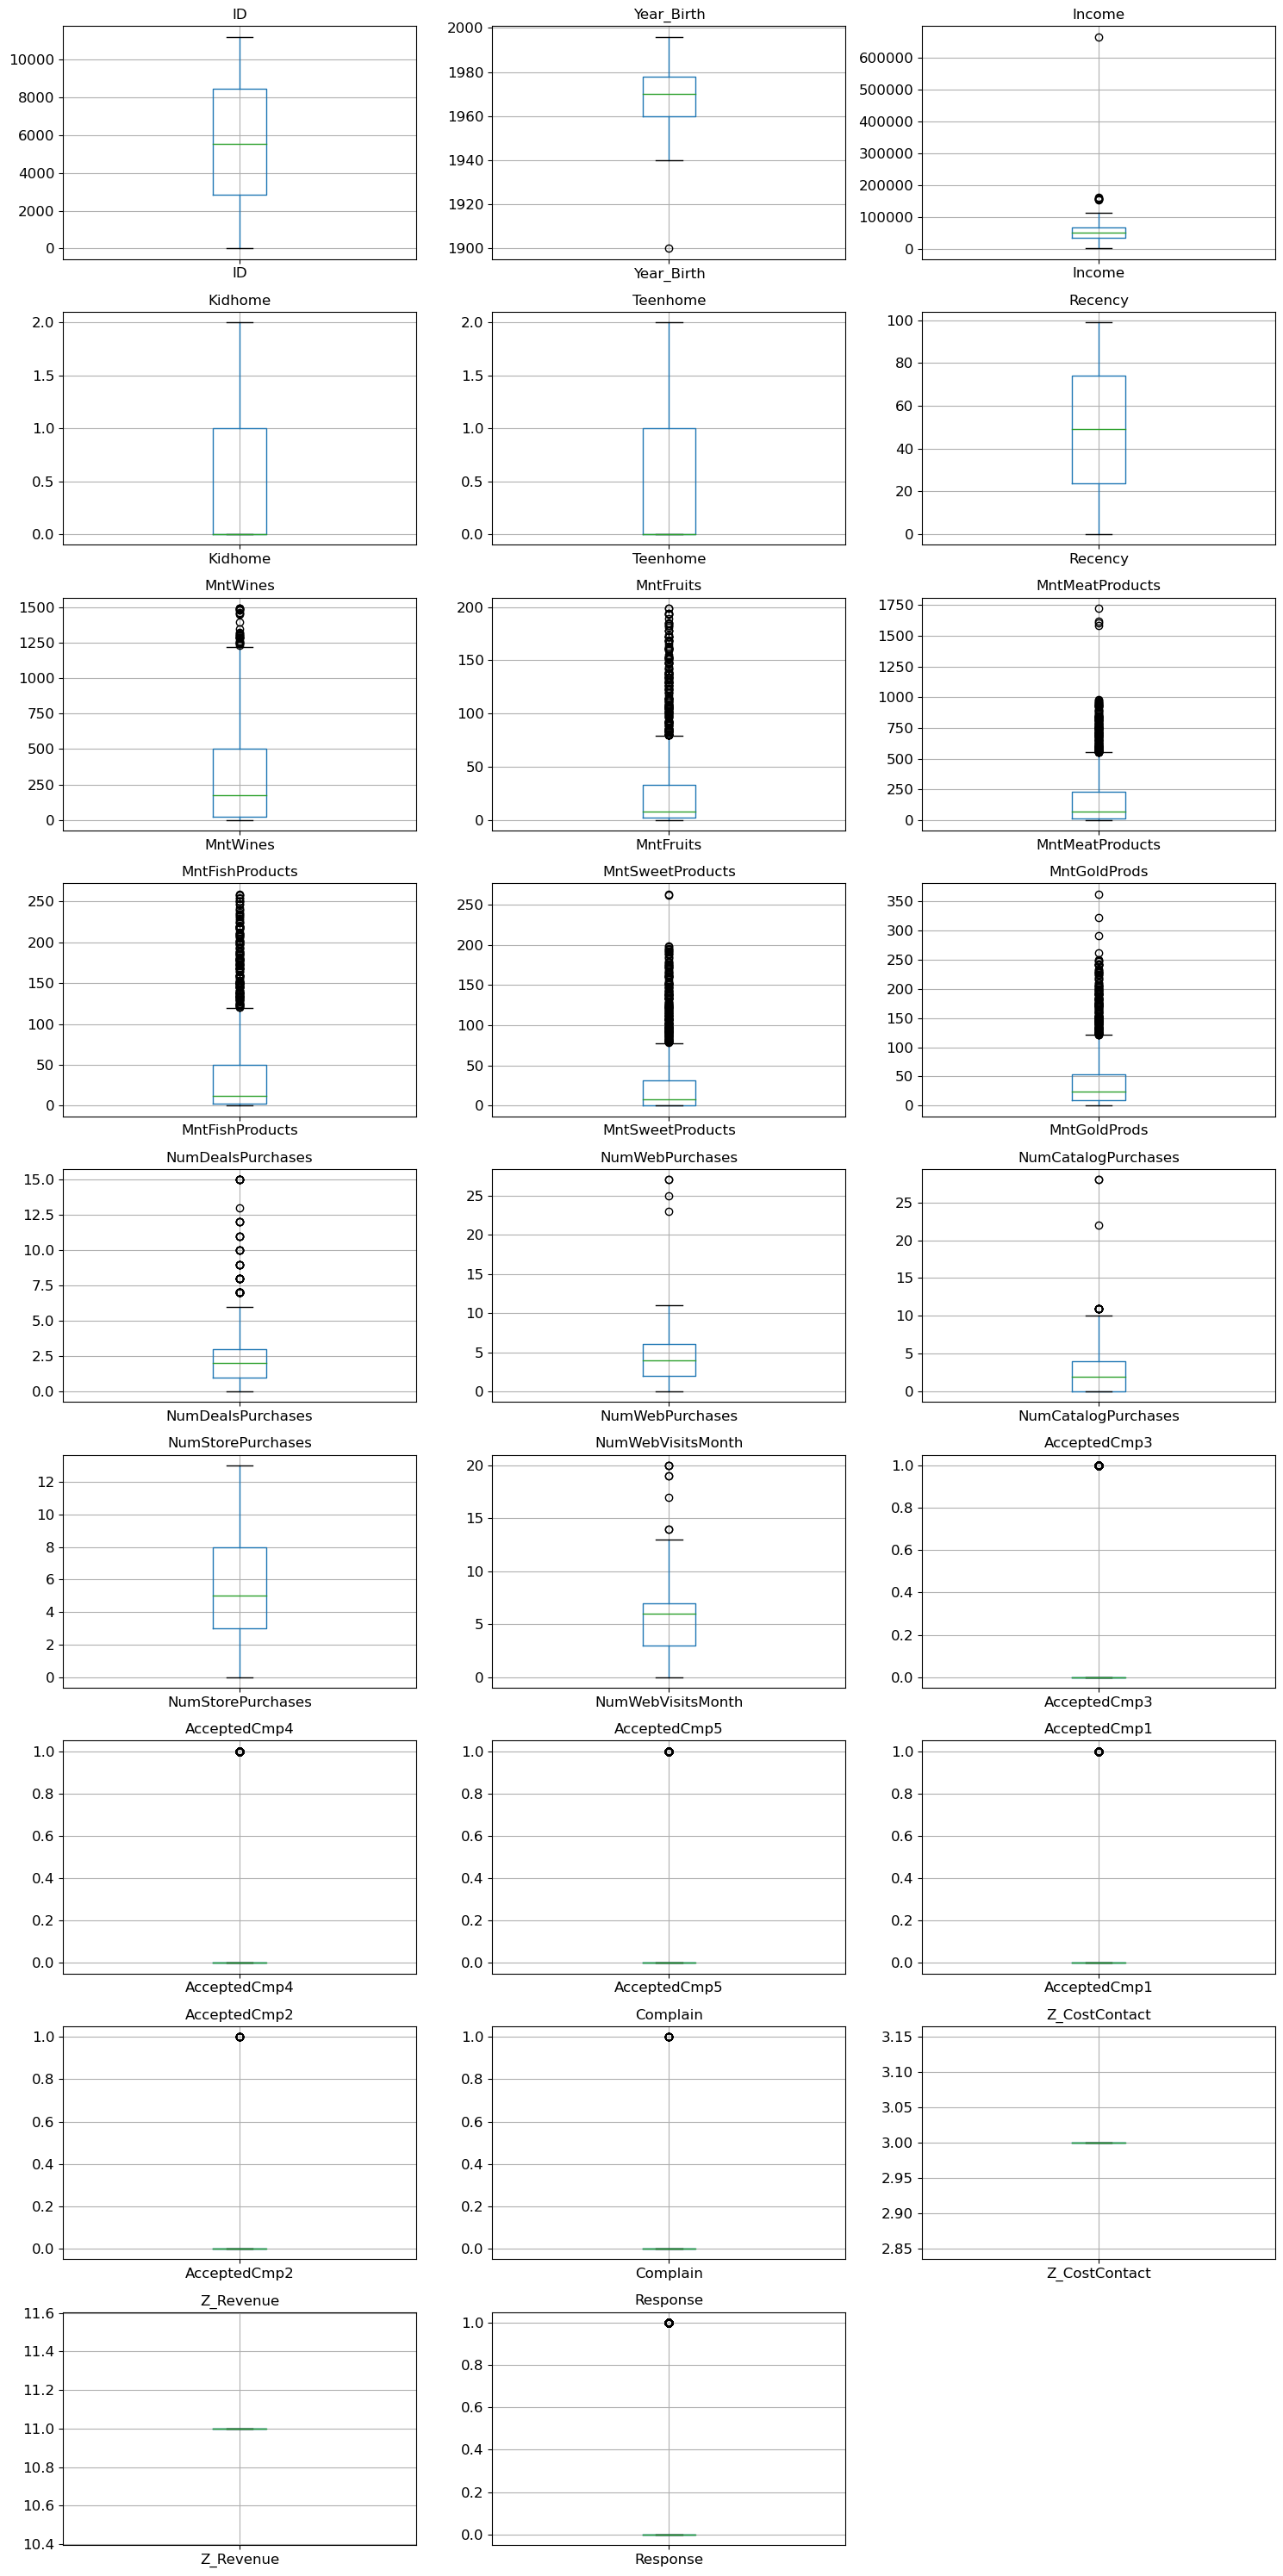

In [22]:
# Calculate number of rows and columns for subplots
num_cols = 3
num_rows = (len(numeric_vars) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create box plots for each numerical variable
for i, column in enumerate(numeric_vars):
    ifood.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Hide any empty subplots
for j in range(len(numeric_vars), num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
save_fig("numeric_box_plots")
plt.show()

##### Strange to have a birth year 1893 when the oldest person in the world was born in 1907. I'll consider 100 years as the maximum, born after 1924.

In [23]:
# Removing age > 100
ifood = ifood.drop(ifood[ifood['Year_Birth'] < 1924].index)

##### It's also more interesting to have age than birth year, so I'm going to create a new column with that info. I'm also doing the same with 'Dt_Customer', which I'm going to get the time spent as a customer in months.

In [24]:
from datetime import datetime

# Calculate time as customer in months
current_date = datetime.now()  # Get the current date
ifood['Dt_Customer'] = pd.to_datetime(ifood['Dt_Customer'])  # Convert to datetime type
ifood['Time_As_Customer_Months'] = ((current_date - ifood['Dt_Customer']) / np.timedelta64(1, 'M')).astype(int)  # Calculate months as customer

# Calculate age
current_year = current_date.year
ifood['Age'] = current_year - ifood['Year_Birth']  # Calculate age

max_age = ifood['Age'].max()
print("Maximum Age:", max_age)

Maximum Age: 84


In [25]:
# Drop 'Dt_Customer' and 'Year_Birth' columns
ifood.drop(['Dt_Customer', 'Year_Birth'], axis=1, inplace=True)

##### Z_CostContact (3 MU) and Z_Revenue (11 MU) are constants used for measuring results, so I'm going to drop them to have a cleaner dataset.

In [26]:
# Drop Z_CostContact and Z_Revenue
ifood.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

##### I'm also creating a new variable with the number of children, which seems more reasonable than having Kidhome and Teenhome.

In [27]:
# Create a new column 'Num_Children' with the sum of 'Kidhome' and 'Teenhome'
ifood['Num_Children'] = ifood['Kidhome'] + ifood['Teenhome']

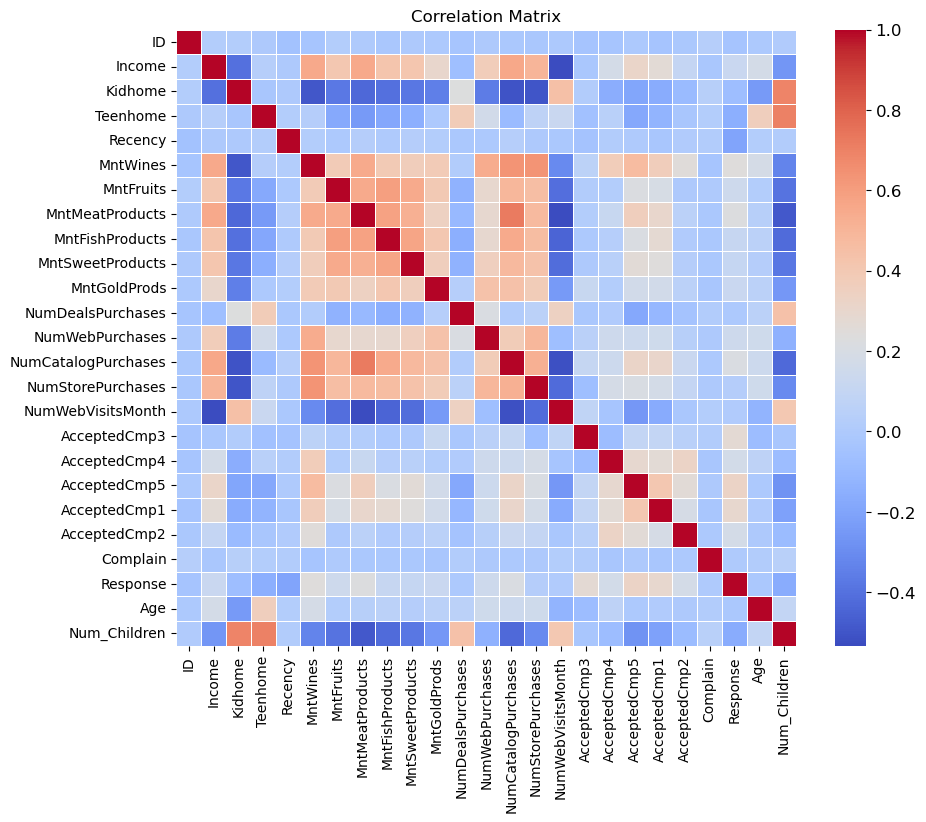

In [28]:
# Get the list of numerical column names
numeric_vars = ifood.select_dtypes(include=['float64', 'int64']).columns

# Correlation analysis
correlation_matrix = ifood[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [29]:
corr_matrix = ifood.corr()
corr_matrix["Response"].sort_values(ascending=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_14020\281690163.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Response                   1.000000
AcceptedCmp5               0.324691
AcceptedCmp1               0.293449
AcceptedCmp3               0.274201
MntWines                   0.243842
MntMeatProducts            0.224764
NumCatalogPurchases        0.211110
Time_As_Customer_Months    0.201295
AcceptedCmp2               0.176268
AcceptedCmp4               0.171677
MntFruits                  0.145034
NumWebPurchases            0.144523
MntGoldProds               0.125384
Income                     0.119724
MntFishProducts            0.109976
MntSweetProducts           0.102361
NumStorePurchases          0.024521
NumWebVisitsMonth          0.006937
Complain                   0.005312
NumDealsPurchases         -0.007424
Age                       -0.016279
ID                        -0.038520
Kidhome                   -0.072577
Teenhome                  -0.155314
Num_Children              -0.164088
Recency                   -0.199017
Name: Response, dtype: float64

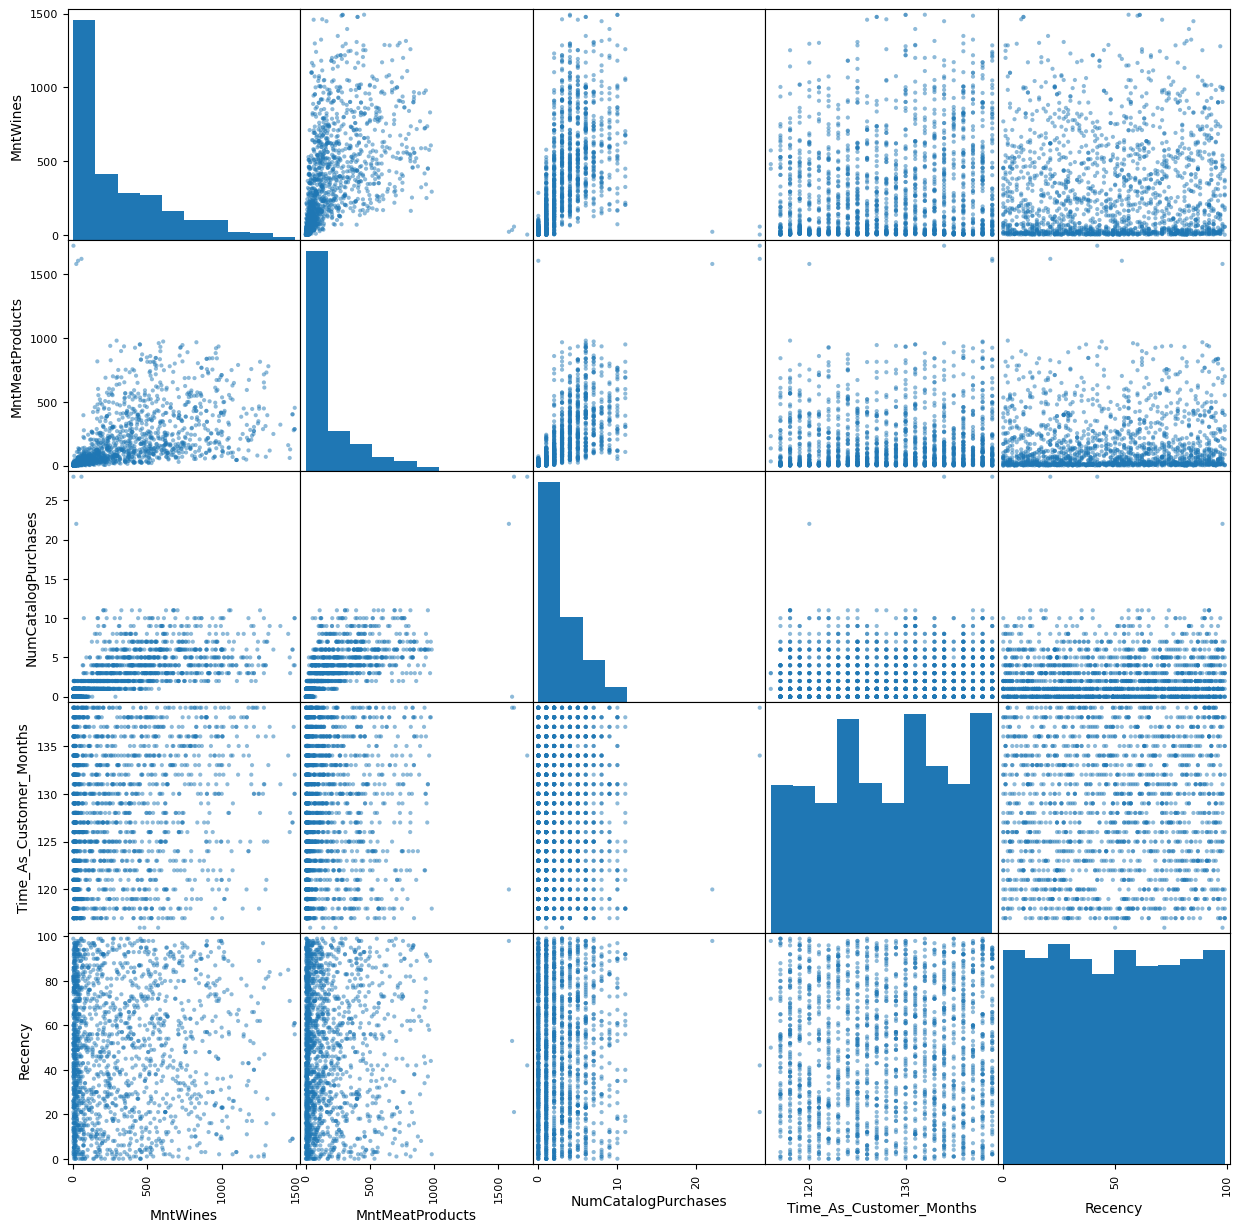

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Time_As_Customer_Months', 'Recency']

scatter_matrix(ifood[attributes], figsize=(15, 15))
plt.show()

##### I'm including total expenses by summing up the expenses on different products to see if it also increases correlation. Additionally, I'm going to transform 'time as customer' into years.

In [31]:
# Summing up expenses on different products to create a new variable 'Total_Expenses'
ifood['Total_Expenses'] = ifood['MntWines'] + ifood['MntFruits'] + ifood['MntMeatProducts'] + ifood['MntFishProducts'] + ifood['MntSweetProducts']

# Transforming 'Time_As_Customer_Months' into years
ifood['Time_As_Customer_Years'] = ifood['Time_As_Customer_Months'] / 12

# Round 'Time_As_Customer_Years' to one decimal place
ifood['Time_As_Customer_Years'] = ifood['Time_As_Customer_Years'].round(1)

##### I'm also going to estimate an average income per person. I'm going to do an initial treatment according to the relationship status. After that, I'll add the number of children. Then, I'll divide the total income by the number of family members under the same roof.

In [32]:
# Initial treatment according to the relationship status
ifood['Income_Per_Person'] = ifood['Income']  # Creating a new column for income per person
marital_status_mapping = {'Married': 2, 'Together': 2, 'Single': 1, 'Divorced': 1, 'Widow': 1}
ifood['Marital_Status_Codf'] = ifood['Marital_Status'].map(marital_status_mapping)

# Adding the number of children
ifood['Num_Family_Members'] = ifood['Marital_Status_Codf'] + ifood['Num_Children']

# Calculating the average income per person
ifood['Income_Per_Person'] = ifood['Income_Per_Person'] / ifood['Num_Family_Members']

In [33]:
corr_matrix = ifood.corr()
corr_matrix["Response"].sort_values(ascending=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_14020\281690163.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Response                   1.000000
AcceptedCmp5               0.324691
AcceptedCmp1               0.293449
AcceptedCmp3               0.274201
Income_Per_Person          0.266594
Total_Expenses             0.258962
MntWines                   0.243842
MntMeatProducts            0.224764
NumCatalogPurchases        0.211110
Time_As_Customer_Years     0.201549
Time_As_Customer_Months    0.201295
AcceptedCmp2               0.176268
AcceptedCmp4               0.171677
MntFruits                  0.145034
NumWebPurchases            0.144523
MntGoldProds               0.125384
Income                     0.119724
MntFishProducts            0.109976
MntSweetProducts           0.102361
NumStorePurchases          0.024521
NumWebVisitsMonth          0.006937
Complain                   0.005312
NumDealsPurchases         -0.007424
Age                       -0.016279
ID                        -0.038520
Kidhome                   -0.072577
Marital_Status_Codf       -0.137358
Teenhome                  -0

## 1.5 Preprocessing data (fr now)

In [39]:
ifood = strat_train_set.drop('Response', axis=1) # drop labels (target) for training set
ifood_label = strat_train_set['Response'].copy()

In [42]:
duplicate_rows_ifood = ifood[ifood.duplicated()]
print("number of duplicate rows: ", duplicate_rows_ifood.shape)

number of duplicate rows:  (0, 28)


In [41]:
sample_incomplete_rows = ifood[ifood.isnull().any(axis=1)].head()
sample_incomplete_rows

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
133    1295        1963  Graduation        Married     NaN        0         1   
1379  10475        1970      Master       Together     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   
2078   5079        1971  Graduation        Married     NaN        1         1   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
133   2013-08-11       96       231  ...                  7   
1379  2013-04-01       39       187  ...                  6   
2084  2013-10-30       75       532  ...                 11   
2228  2012-08-12       53        32  ...                  1   
2078  2013-03-03       82        71  ...                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
133                   4             0             0             0   
1379                  5             0             0             0   
2084                  1             0             0             1   
2228                  0             0             1             0   
2078                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  
133              0             0         0              3         11  
1379             0             0         0              3         11  
2084             0             0         0              3         11  
2228             0             0         0              3         11  
2078             0             0         0              3         11  

[5 rows x 28 columns]

##### Income is a very important variable, based on previous studies and economically speaking. It influences consumption patterns. Therefore, I will remove one outlier from income that is far above the tail, as it will alter my tests in the future. I will leave the others, although there may be consequences due to the sample size.

In [43]:
# Remove rows where 'Income' is above 600000
ifood = ifood[ifood['Income'] <= 600000]

In [45]:
# Filling NaN values with the median value due to distribution asymmetry

# Calculate the median value
median = ifood['Income'].median()
# Fill NaN values with the median value
ifood['Income'].fillna(median, inplace=True)